In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('shampoo.xls', usecols=[1], names=["Sales"], header=0)

In [3]:
data

,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3
5,168.5
6,231.8
7,224.5
8,192.8
9,122.9


In [4]:
data.index = pd.date_range(start="1901-01", periods=len(data), freq="M")

C:\Users\Dell\AppData\Local\Temp\ipykernel_19788\4240276305.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start="1901-01", periods=len(data), freq="M")


In [5]:
data

,Sales
1901-01-31,266.0
1901-02-28,145.9
1901-03-31,183.1
1901-04-30,119.3
1901-05-31,180.3
1901-06-30,168.5
1901-07-31,231.8
1901-08-31,224.5
1901-09-30,192.8
1901-10-31,122.9


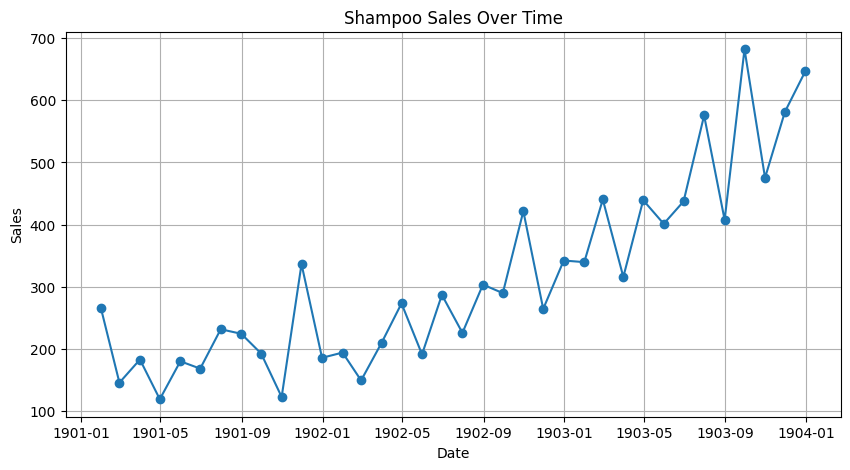

In [6]:
plt.figure(figsize=(10,5))
plt.plot(data, marker='o', linestyle='-')
plt.title("Shampoo Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

In [7]:
result = adfuller(data['Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1]> 0.05:
    print("The data is non- stationary. Differencing is required")
else:
    print("The data is stationary")

ADF Statistic: 3.0601420836411815
p-value: 1.0
The data is non- stationary. Differencing is required


In [8]:
data_diff = data.diff().dropna()

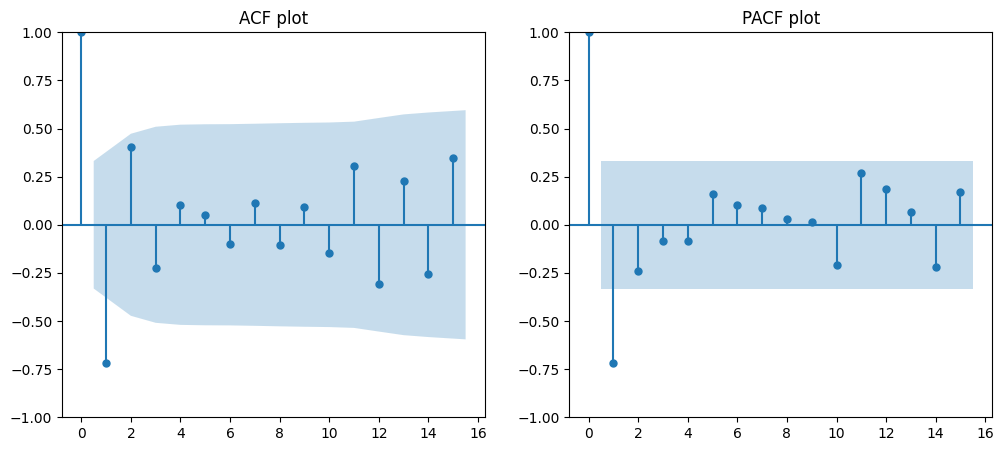

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data_diff, lags=15, ax=axes[0])
plot_pacf(data_diff, lags=15, method="ywm", ax=axes[1])
axes[0].set_title("ACF plot")
axes[1].set_title("PACF plot")
plt.show()

In [10]:
# Fit arima model(p,d,q)=(5,1,0) baed on ACF/PACF analysis.
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()

In [11]:
# what are AIC, BIC

In [12]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 26 Mar 2025   AIC                            408.969
Time:                        16:28:03   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

In [13]:
forecast_steps = 12 # predict for the next 12 months
forecast = model_fit.forecast(steps=forecast_steps)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19788\3261681329.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq="M")[1:], forecast, label="Forecast", color="red")


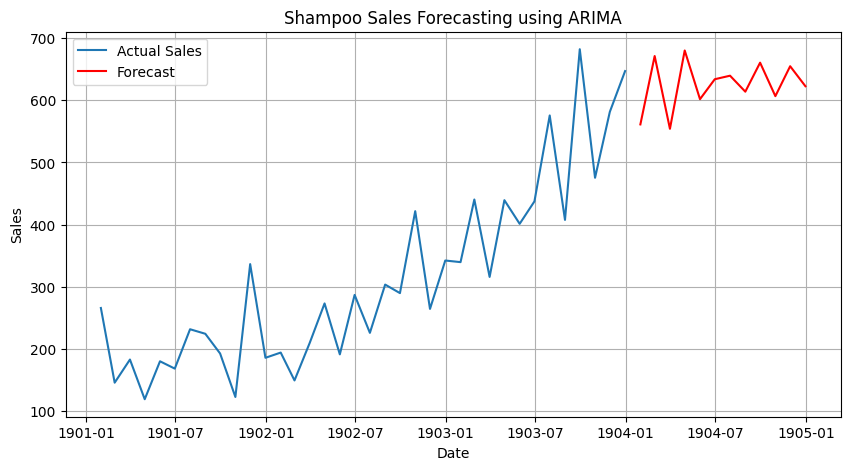

In [14]:
plt.figure(figsize=(10,5))
plt.plot(data, label="Actual Sales")
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq="M")[1:], forecast, label="Forecast", color="red")
plt.title("Shampoo Sales Forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

# Walk-Forward ARIMA

In [15]:
df = pd.read_csv('shampoo.xls', header=0, parse_dates=[0])

C:\Users\Dell\AppData\Local\Temp\ipykernel_19788\47240940.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('shampoo.xls', header=0, parse_dates=[0])


In [16]:
data = df['Sales'].values

In [17]:
train_size = int(len(data)*0.8)
train, test = data[:train_size], data[train_size:]

In [18]:
# Walk-forward validation
history = train.tolist()
predictions = []

for t in test:
    # fit AR model
    model = ARIMA(data, order=(5,1,0))  # usnig last 7 days for autoregresion
    model_fit = model.fit()
    
    # predict next value
    y_pred = model_fit.predict(start=len(history), end=len(history))[0]
    predictions.append(y_pred)
    
    # update history with actual obesrvation
    history.append(t)
    

In [19]:
# Evaluate performanace
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Walk-Forward Validation RMSE: {rmse:.4f}')

Walk-Forward Validation RMSE: 77.9935


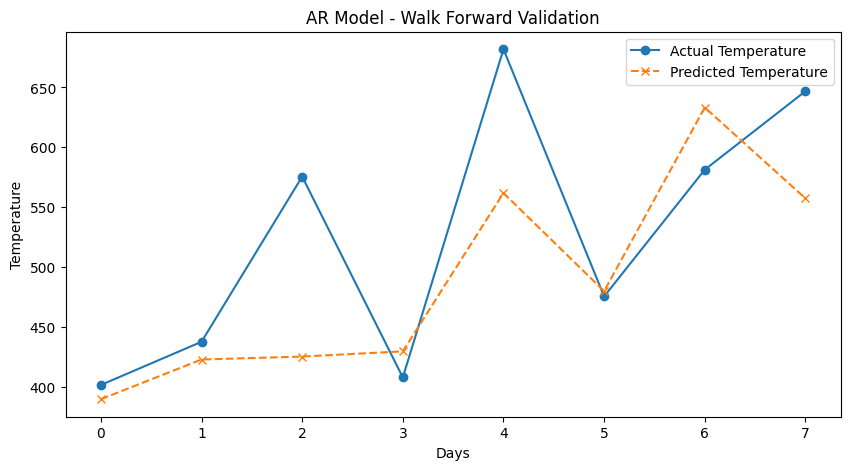

In [20]:
# plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test, label='Actual Temperature', marker='o')
plt.plot(predictions, label='Predicted Temperature', marker='x', linestyle='dashed')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('AR Model - Walk Forward Validation')
plt.legend()
plt.show()